# 機械学習入門授業前課題3 オブジェクト指向の活用

In [31]:
%config IPCompleter.greedy=True

- 課題の目的 抜粋

クラスを利用したコードを読み書きできるようにする
既に登場していたクラスを例に、クラスを活用することでどのようなことができるのかを見て学んでいきます。そして課題の後半ではStandardScalerのクラスをスクラッチで自作します。

### scikit-learnの標準化クラス

scikit-learnに用意されている標準化を行うためのクラスStandardScalerを例に見ていきます。サンプルコードを用意しましたので、これを利用しながら理解していきます。


sklearn.preprocessing.StandardScaler — scikit-learn 0.21.3 documentation


**《サンプルコード》**

In [4]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
data = load_iris()
X = data.data[:10]
scaler = StandardScaler()
scaler.fit(X)
print("平均 :", scaler.mean_)
print("分散 :", scaler.var_)
X_std = scaler.transform(X)

平均 : [4.86 3.31 1.45 0.22]
分散 : [0.0764 0.0849 0.0105 0.0056]


**インスタンス化**

クラスを使う際はまず以下のようなコードを書きますが、これを インスタンス化 と呼びます。


scaler = StandardScaler()


StandardScalerというクラスオブジェクトから、scalerと名前をつけたインスタンスオブジェクトが作られました。


**《クラスの命名法》**


Pythonではクラス名は頭文字が大文字、他は小文字という命名法がPEP8により定められています。単語間にアンダースコアは入れません。これを CapWords 方式と呼びます。


はじめに — pep8-ja 1.0 ドキュメント クラスの名前


こういった形式のものはクラスだと判断することができます。


**《インスタンスは複数作れる》**


あるクラスオブジェクトからは複数のインスタンスオブジェクトを作成することが可能です。

In [5]:
scaler0 = StandardScaler()
scaler1 = StandardScaler()
scaler2 = StandardScaler()

### 【問題1】これまで利用してきたクラスの列挙
クラスを使う際はインスタンス化を行うことと、クラスの命名法がわかりました。この情報を元に、これまでの課題で利用してきたコードの中でどのようなクラスがあったかを答えてください。


Pandas、matplotlib、scikit-learnからそれぞれ1つ以上見つけてください。

- Pandas→　pd.DataFrame, pd.Series


- matplotlib→ lines.Line2D, legend, figure, title, xlim, 
( https://qiita.com/kannoma/items/b24c7529174ea81a4cfb )


- scikit-learn→ LogistickRegression

**メソッド**

インスタンス化を行った後には、scaler.fit(X)のような **メソッド** の実行ができます。StandardScalerのfitメソッドは後でスケーリングに使われる平均と標準偏差を計算する機能があります。


**インスタンス変数（アトリビュート）**

fitメソッドにより平均と標準偏差が計算されましたが、見た目には変化があるわけではありません。しかし、scalerインスタンスの内部では計算結果が保存されています。こういったインスタンスの中で値を保存するものを **インスタンス変数** や **アトリビュート（属性）** と呼びます。ここで平均がscaler.mean_、標準偏差の2乗した値である分散がscaler.var_に保存されています。


以下のようにprint文で出力させることができます。

In [6]:
print("平均 : {}".format(scaler.mean_)) # 平均 : [4.86 3.31 1.45 0.22]
print("分散 : {}".format(scaler.var_)) # 分散 : [0.0764 0.0849 0.0105 0.0056]

平均 : [4.86 3.31 1.45 0.22]
分散 : [0.0764 0.0849 0.0105 0.0056]


**《メソッドとインスタンス変数の命名法》**


メソッドやインスタンス変数の命名は関数と同様に、全て小文字で行います。単語をつなぐときにはアンダースコアを入れます。


はじめに — pep8-ja 1.0 ドキュメント メソッド名とインスタンス変数

### 【問題2】これまで利用してきたメソッドやインスタンス変数の列挙
これまでの課題で利用してきたコードの中でどのようなメソッドやインスタンス変数があったかを答えてください。


最低でもそれぞれ5つ以上答えてください。

- メソッド(括弧で呼び出せるのがメソッド)→sum, isnull, describe, info, head, tail, abs, range, append, format


- インスタンス変数→shape, type, ndarray, array, mean, columns, loc


**《ndarrayやstrもインスタンス》**


ドットをつけるというと、NumPyのndarrayに対してndarray.shapeやndarray.sum()のような使い方は何度も利用してきたかと思います。これは、ndarrayもインスタンスオブジェクトであり、shapeはインスタンス変数、sumはメソッドだったということです。


Pythonのコードに登場するデータはどれもインスタンスオブジェクトであり、listやstrもメソッドを持ちます。

（例）

5. データ構造 — Python 3.7.4 ドキュメント 5.1. リスト型についてもう少し

In [7]:
l = ['a']
l.append('b') # listのappendメソッド

4. 組み込み型 — Python 3.7.4 ドキュメント 文字列メソッド

In [1]:
s = 'Hello, World!'
s.find('W') # strのfindメソッド

7

インスタンス変数をメソッドが利用
最終的に以下のようにして標準化を行います。


X_std = scaler.transform(X)


これはfitメソッドで計算したことでインスタンス変数mean_やvar_に保存されていた値を使い、Xを変換したということです。


このようにクラスには複数のメソッドやインスタンス変数が存在し、これらを組み合わせていろいろな機能を実現します。

### 【問題3】標準化クラスをスクラッチで作成
理解をより深めるため、StandardScalerをスクラッチで作成しましょう。scikit-learnは使わず、NumPyなどを活用して標準化の計算を記述します。具体的にはfitメソッドとtransformメソッドを作ります。


今回は雛形を用意しました。クラスの作成方法は関数に近いです。メソッドはクラスの中にさらにインデントを一段下げて記述します。


インスタンス変数を作成する際はself.mean_のようにselfを付けます。クラスの外からscaler.mean_と書いていたscalerの部分が自分自身を表すselfになっています。

In [192]:
#練習用

#リスト内の総和
# https://www.it-swarm-ja.tech/ja/python/%E3%83%AA%E3%82%B9%E3%83%88%E5%86%85%E3%81%AE%E5%90%84%E8%A6%81%E7%B4%A0%E3%81%AB%E6%95%B0%E5%80%A4%E3%82%92%E4%B9%97%E7%AE%97%E3%81%99%E3%82%8B%E3%81%AB%E3%81%AF%E3%81%A9%E3%81%86%E3%81%99%E3%82%8C%E3%81%B0%E3%82%88%E3%81%84%E3%81%A7%E3%81%99%E3%81%8B%EF%BC%9F/822429893/

#分散の計算式
# https://sci-pursuit.com/math/statistics/variance.html

import pandas as pd
X = [[3, 3,3,4], [3,4,5,3]]
X = np.array(X)

#sum(((pd.Series(X)-(X.sum() / len(X)))**2)) /len(X)
len(X)

2

In [216]:
import pandas as pd
import math

class ScratchStandardScaler():
    def fit(self, X):
        self.mean = sum(X)/len(X)
        self.var = sum((list(X)-(self.mean))**2) /len(X)
        
    def transform(self, X):
        return (X-(self.mean)) / np.sqrt(self.var)

以下のコードが実行できるようにしましょう。

In [217]:
import numpy as np
from sklearn.datasets import load_iris
data = load_iris()
X = data.data[:10]
scratch_scaler = ScratchStandardScaler()
scratch_scaler.fit(X)
print("平均 : {}".format(scratch_scaler.mean))
print("分散 : {}".format(scratch_scaler.var))
X_std = scratch_scaler.transform(X)
print(X_std)

平均 : [4.86 3.31 1.45 0.22]
分散 : [0.0764 0.0849 0.0105 0.0056]
[[ 0.86828953  0.65207831 -0.48795004 -0.26726124]
 [ 0.14471492 -1.06391725 -0.48795004 -0.26726124]
 [-0.57885968 -0.37751902 -1.46385011 -0.26726124]
 [-0.94064699 -0.72071813  0.48795004 -0.26726124]
 [ 0.50650222  0.99527742 -0.48795004 -0.26726124]
 [ 1.95365143  2.02487476  2.43975018  2.40535118]
 [-0.94064699  0.3088792  -0.48795004  1.06904497]
 [ 0.50650222  0.3088792   0.48795004 -0.26726124]
 [-1.66422159 -1.40711636 -0.48795004 -0.26726124]
 [ 0.14471492 -0.72071813  0.48795004 -1.60356745]]


**ライブラリのソースコードを確認**

scikit-learnの場合は公式ドキュメントの右上にソースコードへのリンクがあります。

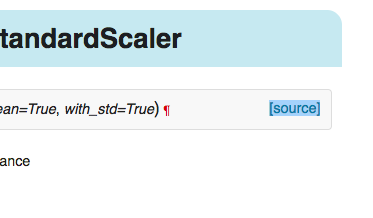

[source]


どのようなコードになっていたかを確認してみましょう。（問題3に取り組んだ後に見ることを推奨します）スクラッチで作成したものよりも全体的にコードが長いのではないかと思います。inverse_transformメソッドのように作成しなかったものもありますが、それだけではありません。例えば以下のように、warning文が記述されているなどします。

In [127]:
if not isinstance(y, string_types) or y != 'deprecated':
    warnings.warn("The parameter y on transform() is "
                  "deprecated since 0.19 and will be removed in 0.21",
                  DeprecationWarning)

NameError: name 'y' is not defined

しかし、特に今注目したいのは次の特殊メソッドについてです。


**特殊メソッド**
ソースコードの中に含まれる、まだ説明していない重要な部分が以下です。


このような__init__というメソッドは、どのクラスにも共通して置かれる **コンストラクタ** と呼ばれるメソッドです。

In [128]:
def __init__(self, copy=True, with_mean=True, with_std=True):
    self.with_mean = with_mean
    self.with_std = with_std
    self.copy = copy


今回のスクラッチではcopy、with_mean、with_stdなどのパラメータを省略しましたが、このようにインスタンス化の際にパラメータを指定して保存しておくということはよくある使い方です。


コンストラクタの動作を確認するためのサンプルコードを用意しました。コンストラクタは、インスタンス化が行われる時に自動的に実行されるという働きがあります。こういった特殊な動作をするメソッドを、 **特殊メソッド** と呼びます。

### 【問題4】 四則演算を行うクラスの作成
上記ExampleClassは足し算のメソッドを持っていますが、これに引き算、掛け算、割り算のメソッドを加えてください。


コンストラクタに入力されたvalueが文字列や配列など数値以外だった場合にはエラーを出すようにしてください。


クラス名や説明文も適切に書き換えてください。

In [231]:
class Arithmetic():
    def __init__(self, value):
        assert type(value) in [int, float], "only int or float"
        self.value = value
        print("初期値{}が設定されました".format(self.value))
        
    def add(self, value2):
        self.value += value2
        
    def sub(self, value2):
        self.value -= value2
        
    def mul(self, value2):
        self.value *= value2
        
    def div(self, value2):
        self.value /= value2
        
arith = Arithmetic(5)
print("value : {}".format(arith.value))

arith .add(5)
print("value : {}".format(arith.value))

arith .sub(5)
print("value : {}".format(arith.value))

arith .mul(5)
print("value : {}".format(arith.value))

arith .div(5)
print("value : {}".format(arith.value))

初期値5が設定されました
value : 5
value : 10
value : 5
value : 25
value : 5.0
